In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_circles,make_blobs
from sklearn.datasets import load_digits, load_breast_cancer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

X (50, 2)
[0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 1 0 1 1 1 0 0 1 0 1 1 1]


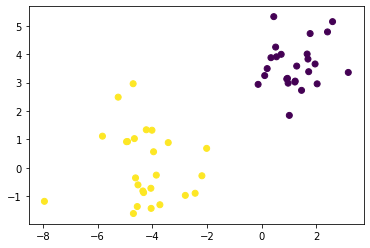

In [8]:
X,y = make_blobs(n_samples=50,n_features=2,centers=2)
print('X',X.shape)
print(y)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [9]:
model = LogisticRegression()
model.fit(X,y)
print(model.coef_)
print(model.intercept_)

[[-1.30687597 -0.88854299]]
[-0.10567086]


Modelo $ b_0 + b_1 x_1 + b_2 x_2 = 0 $

$ b_2 x_2 = - b_0 - b_1 x_1 $

$ x_2 = - \frac{b_0}{b_2} - \frac{b_1}{b_2} x_1 $

Se parece

$ y = b + mx $

In [10]:
b0 = model.intercept_
b1 = model.coef_[0][0]
b2 = model.coef_[0][1]
m = -b1/b2
b = -b0/b2

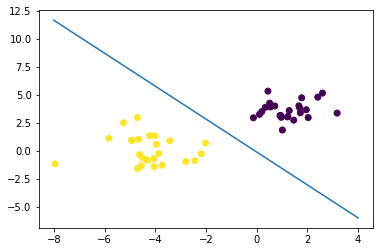

In [12]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot( [-8, 4], [b+-8*m, b+4*m] )
plt.show()

## Nonlinear model

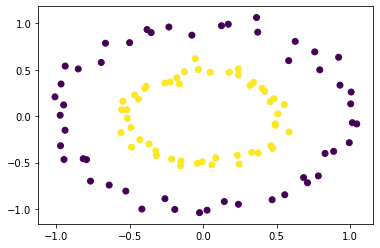

In [19]:
X, y = make_circles(n_samples=100, factor=0.5, noise = 0.05)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [25]:
XX = np.concatenate((X,X**2),axis=1)
print(XX.shape)

(100, 4)


In [26]:
model = LogisticRegression()
model.fit(XX,y)
print(model.coef_)
print(model.intercept_)

[[ 0.02225067 -0.01996279 -3.65052575 -3.67376767]]
[2.28164163]


Modelo

$ b_0 + b_1 x + b_2 y + b_3 x^2 + b_4 y^2 = 0 $

Si quitamos los coeficientes que son casi 0:

$ b_0 + b_3 x^2 + b_4 y^2 = 0 $

$ b_4 y^2 = - b_0 - b_3 x^2 $

$ y^2 = - \frac{b_0}{b_4} - \frac{b_3}{b_4} x^2 $

$ y = \sqrt{- \frac{b_0}{b_4} - \frac{b_3}{b_4} x^2 }$

Se parece 

$ y = b + mx $


[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


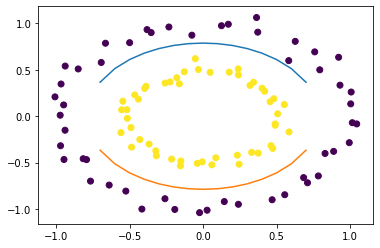

In [36]:
b0 = model.intercept_
b3 = model.coef_[0][2]
b4 = model.coef_[0][3]

px = np.arange(-1.0,1.0,0.1)
print(px)

py = np.sqrt( -(b0/b4) - (b3/b4)*px**2 )
py2 = -np.sqrt( -(b0/b4) - (b3/b4)*px**2 )

plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(px,py)
plt.plot(px,-py)
plt.show()

# Digits dataset

In [51]:
X,Y = load_digits(return_X_y = True)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=42)
print('X',X.shape)
print('Xtrain',Xtrain.shape)
print('Xtest',Xtest.shape)

X (1797, 64)
Xtrain (1257, 64)
Xtest (540, 64)


In [52]:
model = LogisticRegression()
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
yprob = model.predict_proba(Xtest)

print('Acc:',accuracy_score(ytest,ypred))
print('Macro F1:',f1_score(ytest,ypred,average='macro'))
print( confusion_matrix(ytest,ypred) )

Acc: 0.9648148148148148
Macro F1: 0.9648353319332248
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0  2  0]
 [ 0  1 46  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 58  0  1  0  0  0]
 [ 0  1  0  0  0 62  1  1  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 53  0  1]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  2 56]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
print(ypred[:5])
print(np.round(yprob[:5],2))

[6 9 3 7 2]
[[0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.99 0.   0.   0.   0.   0.   0.   0.  ]]


In [44]:
print(model.coef_)
print(model.intecept_)

[[ 0.00000000e+00 -9.91905173e-03 -3.88739983e-02  5.83935458e-02
   2.94781389e-02 -9.28133050e-02 -1.43094653e-01 -1.71778529e-02
  -8.51394657e-05 -8.11867541e-02  6.01624286e-02  1.54916102e-01
  -3.25760823e-03  9.95080442e-02 -7.96091642e-02 -1.62764294e-02
  -1.86980986e-03  1.32174500e-02  1.24953260e-01 -3.92344266e-02
  -3.65143677e-01  1.73312549e-01  4.30439796e-02 -4.72509182e-03
  -9.28979622e-04  1.33635516e-01  1.26984666e-01 -1.18553315e-01
  -4.07168641e-01  6.41562718e-02  5.25296250e-02 -3.12788889e-04
   0.00000000e+00  1.66057670e-01  1.10480074e-01 -1.58735132e-01
  -3.41206831e-01  5.71327991e-02  3.63651485e-02  0.00000000e+00
  -7.32002439e-04 -4.23118881e-02  2.58041617e-01 -2.00190577e-01
  -1.50156029e-01  6.09202823e-02  3.63903651e-02 -4.91426897e-04
  -2.35736452e-03 -1.13182005e-01  1.18623011e-01 -8.27677448e-02
   1.21574541e-01  1.66181459e-03 -1.97622414e-02 -8.04682759e-03
  -1.25417586e-05 -1.03395483e-02 -1.06697241e-01  2.00628929e-01
  -1.41684

AttributeError: 'LogisticRegression' object has no attribute 'intecept_'

In [41]:
Xtrain2 = np.concatenate((Xtrain,Xtrain**2),axis=1)
Xtest2 = np.concatenate((Xtest,Xtest**2),axis=1)

model = LogisticRegression()
model.fit(Xtrain2,ytrain)
ypred = model.predict(Xtest2)

print('Acc:',accuracy_score(ytest,ypred))
print('Macro F1:',f1_score(ytest,ypred,average='macro'))
print( confusion_matrix(ytest,ypred) )

Acc: 0.9462962962962963
Macro F1: 0.9455514751695329
[[51  0  1  0  1  0  0  0  0  0]
 [ 0 45  2  1  0  0  0  0  2  0]
 [ 0  0 46  0  0  0  0  0  1  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  3  0  0 55  0  1  0  1  0]
 [ 0  1  1  0  0 62  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  1  0  0  0 51  0  3]
 [ 0  1  0  0  0  0  0  0 42  0]
 [ 0  0  0  3  0  0  0  0  2 54]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Breast cancer

In [46]:
X,Y = load_breast_cancer(return_X_y = True)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=42)
print('X',X.shape)
print('Xtrain',Xtrain.shape)
print('Xtest',Xtest.shape)

X (569, 30)
Xtrain (398, 30)
Xtest (171, 30)


In [48]:
model = LogisticRegression()
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
yprob = model.predict_proba(Xtest)
print('Acc:',accuracy_score(ytest,ypred))
print('Macro F1:',f1_score(ytest,ypred,average='macro'))
print( confusion_matrix(ytest,ypred) )

Acc: 0.9707602339181286
Macro F1: 0.9682592716338123
[[ 59   4]
 [  1 107]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
print( ypred[:10] )
print( np.round(yprob[:10],2))

[1 0 0 1 1 0 0 0 1 1]
[[0.13 0.87]
 [1.   0.  ]
 [0.99 0.01]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.02 0.98]]
